# Практическая работа №5
#### Вариант 3
#### Выполнил студент группы P3212 Балин Артем Алексеевич
### Задание
Каждый студент получает выборку из 20 чисел. Необходимо определить следующие статистические
характеристики: вариационный ряд, экстремальные значения и размах, оценки математического
ожидания и среднеквадратического отклонения, эмпирическую функцию распределения и её
график, гистограмму и полигон приведенных частот группированной выборки. Для расчета
характеристик и построения графиков нужно написать программу на одном из языков
программирования. Листинг программы и результаты работы должны быть представлены в отчете
по практической работе.
### Выполнение

#### Необходимые библиотеки

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

#### Числа для моего варианта

In [298]:
numbers = [-0.03, 0.73, -0.59, -1.59, 0.38, 1.49, 0.14, -0.62, -1.59, 1.45, 
           -0.38, -1.49, -0.15, 0.63, 0.06, -1.59, 0.61, 0.62, -0.05, 1.56]

#### Сортировка чисел для построения вариационного ряда

In [299]:
variation_s = sorted(numbers)
print(*variation_s)

-1.59 -1.59 -1.59 -1.49 -0.62 -0.59 -0.38 -0.15 -0.05 -0.03 0.06 0.14 0.38 0.61 0.62 0.63 0.73 1.45 1.49 1.56


#### Экстремальные значения

In [300]:
maxn = max(numbers)
minn = min(numbers)
print("Максимальное значение: "+str(maxn))
print("Минимальное значение: "+str(minn))

Максимальное значение: 1.56
Минимальное значение: -1.59


#### Размах
Из-за плохой точности значений с плавающей точкой, для точного ответа нужно привести числа к целому типу

In [301]:
print("Размах: "+str((int(maxn*100)-int(minn*100))/100))

Размах: 3.15


### Статистический ряд для оценки математического ожидания и среднеквадратичного отклонения

In [302]:
unique, counts = np.unique(variation_s, return_counts=True)
statiscical_s = np.array([[number, c] for number ,c in zip(unique, counts)])
for x in statiscical_s:
    print(x[0], int(x[1]), sep=": ")

-1.59: 3
-1.49: 1
-0.62: 1
-0.59: 1
-0.38: 1
-0.15: 1
-0.05: 1
-0.03: 1
0.06: 1
0.14: 1
0.38: 1
0.61: 1
0.62: 1
0.63: 1
0.73: 1
1.45: 1
1.49: 1
1.56: 1


#### Математическое ожидание

In [303]:
mean = sum(x*n for x,n in statiscical_s)/len(statiscical_s)
print("Оценка математического ожидания (выборочное среднее): "+str(mean))

Оценка математического ожидания (выборочное среднее): -0.022777777777777772


#### Выборочная дисперсия

In [304]:
D = 1/(len(statiscical_s)-1)*sum((x-mean)**2*n for x,n in statiscical_s)
print(D)

1.1358234567901233


#### Выборочное среднеквадратичное отклонение

In [305]:
Sv = np.sqrt(D)
print(Sv)

1.0657501849824484


#### Исправленные СКО и дисперсия


In [306]:
D_i = len(variation_s)/(len(statiscical_s)-1)*D # исправленная дисперсия
std = np.sqrt(D_i) # исправленное СКО
print("Исправленная дисперсия: "+str(D_i))
print("Исправленное СКО: "+str(std))

Исправленная дисперсия: 1.3362628903413216
Исправленное СКО: 1.1559683777428005


### Эмпирическая функция распределения

Cumulative sum: 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Cumulative probability: 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7 0.75 0.8 0.85 0.9 0.95 1.0
F(X) = {
-inf < x < -1.59: 0;
-1.59 < x < -1.49: 0.15;
-1.49 < x < -0.62: 0.2;
-0.62 < x < -0.59: 0.25;
-0.59 < x < -0.38: 0.3;
-0.38 < x < -0.15: 0.35;
-0.15 < x < -0.05: 0.4;
-0.05 < x < -0.03: 0.45;
-0.03 < x < 0.06: 0.5;
0.06 < x < 0.14: 0.55;
0.14 < x < 0.38: 0.6;
0.38 < x < 0.61: 0.65;
0.61 < x < 0.62: 0.7;
0.62 < x < 0.63: 0.75;
0.63 < x < 0.73: 0.8;
0.73 < x < 1.45: 0.85;
1.45 < x < 1.49: 0.9;
1.49 < x < 1.56: 0.95;
1.56 < x < +inf: 1.0;
}


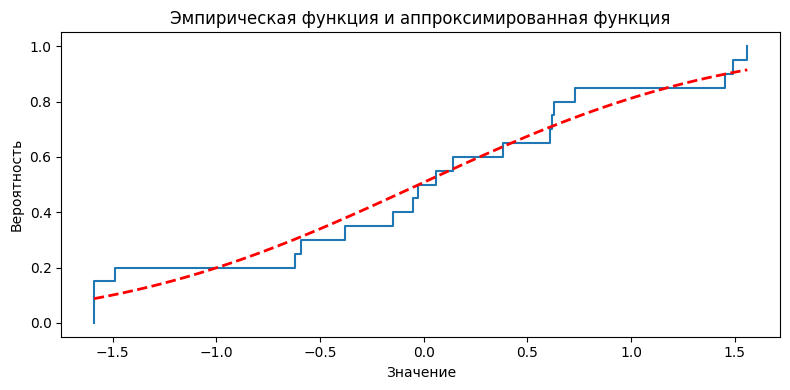

In [307]:

imp_probability = np.cumsum(counts) / len(variation_s)
print("Cumulative sum:", *np.cumsum(counts))
print("Cumulative probability:", *imp_probability)
# Вывод функции распределения
print("F(X) = {", end="\n")
print(f"-inf < x < {unique[0]}: 0", end=";\n")
for i in range(len(unique)):
    if i == 0:
        print(
            f"{unique[i]} < x < {unique[i+1]}: {imp_probability[i]}", end=";\n")
    else:
        if i == len(unique) - 1:
            print(
                f"{unique[i]} < x < +inf: {imp_probability[i]}", end=";\n")
        else:
            print(
                f"{unique[i]} < x < {unique[i+1]}: {imp_probability[i]}", end=";\n")
print("}")
plt.figure(figsize=(8, 4))
plt.subplot(1, 1, 1)
ecdf = ECDF(variation_s)
plt.step(ecdf.x,ecdf.y, where='post')

x = np.linspace(minn, maxn, 100)
p = norm.cdf(x, mean, std)
plt.plot(x, p, 'r--', linewidth=2, label='Аппроксимированная функция (нормальное распределение)')
plt.title('Эмпирическая функция и аппроксимированная функция')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.tight_layout()
plt.savefig('эмпирическая.png')
plt.show()



### Гистограмма и полигон приведенных частот группированной выборки

Начало:-1.59:	 Конец:-1.06 	 Частота:0.2
Начало:-1.06:	 Конец:-0.54 	 Частота:0.1
Начало:-0.54:	 Конец:-0.01 	 Частота:0.2
Начало:-0.01:	 Конец:0.51 	 Частота:0.15
Начало:0.51:	 Конец:1.03 	 Частота:0.2
Начало:1.03:	 Конец:1.56 	 Частота:0.15


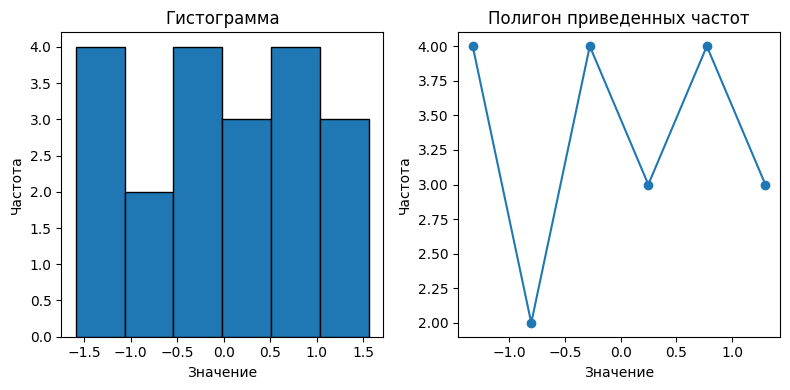

In [308]:
num_bins = 6  # Количество интервалов
hist, bins = np.histogram(variation_s, bins=num_bins)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(variation_s, bins=num_bins, edgecolor='black')
plt.title('Гистограмма')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, hist, marker='o', linestyle='-')
plt.title('Полигон приведенных частот')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.tight_layout()
plt.savefig('гистограмма.png')
plt.show()